# Sea Animals Image Classification Project

### Member
 - 6310401009 ณัฐภัทร สุดประเสริฐ
 - 6310401165 วิศรุต หอมแก่นจันทร์

# Import

In [1]:
import os 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random

# Model
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D

# Data path and classes

In [2]:
data = "sea-animal-image"
classes = sorted(os.listdir(data))
classes

['basking',
 'blacktip',
 'blue',
 'bull',
 'hammerhead',
 'lemon',
 'mako',
 'nurse',
 'sand tiger',
 'thresher',
 'tiger',
 'whale',
 'white',
 'whitetip']

# Classes Info

In [3]:
classes_info = {}
for name in classes:
    classes_info[name] = len(os.listdir(data + f'/{name}'))
print(classes_info)

{'basking': 110, 'blacktip': 134, 'blue': 116, 'bull': 113, 'hammerhead': 140, 'lemon': 132, 'mako': 115, 'nurse': 87, 'sand tiger': 105, 'thresher': 134, 'tiger': 106, 'whale': 153, 'white': 135, 'whitetip': 138}


In [4]:
fig = px.bar(x=classes_info.keys(),y=classes_info.values(),title='Classes Info ')
fig.show()

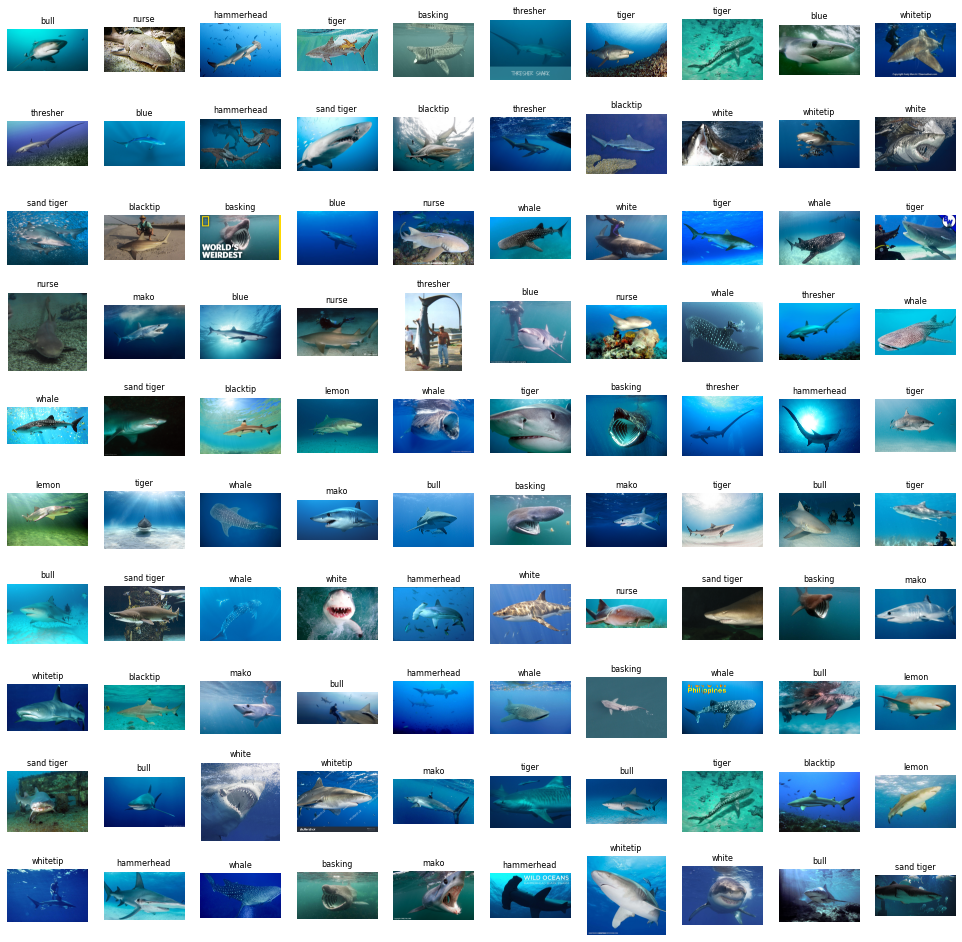

In [5]:
# visualize the training data
W = 10
H = 10
fig, axes = plt.subplots(W, H, figsize = (17,17))

axes = axes.ravel() # flaten the matrix into array

# Select a random number from 0 to n_training/ images will be selected randomly
for i in np.arange(0, W * H): 
    
    # Select a class randomly
    label = random.choice(os.listdir(data))
    class_dir = os.path.join(data,label)
    
    # Select a random image
    image = random.choice(os.listdir(class_dir))
    
    # read and display an image with the selected index    
    img = plt.imread(os.path.join(class_dir,image))
    axes[i].imshow( img )
    axes[i].set_title(label, fontsize = 8) # the label
    axes[i].axis('off')

# Data Splitting

In [6]:
train_val_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    zoom_range = 0.2,
    validation_split = 0.1
)

test_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


# datasets

training_set = train_val_gen.flow_from_directory(
    data,
    target_size=(200,200),
    batch_size=32,
    shuffle = True,
    class_mode= 'categorical',
    subset = 'training'
)

validation_set = train_val_gen.flow_from_directory(
    data,
    target_size=(200,200),
    batch_size=32,
    shuffle = True,
    class_mode= 'categorical',
    subset = 'validation'
)

test_set = test_gen.flow_from_directory(
    data,
    target_size=(200,200),
    batch_size=32,
    shuffle = True,
    class_mode= 'categorical' ,
    subset = 'validation'
)

Found 1541 images belonging to 14 classes.
Found 165 images belonging to 14 classes.
Found 336 images belonging to 14 classes.


In [7]:
training_set.class_indices

{'basking': 0,
 'blacktip': 1,
 'blue': 2,
 'bull': 3,
 'hammerhead': 4,
 'lemon': 5,
 'mako': 6,
 'nurse': 7,
 'sand tiger': 8,
 'thresher': 9,
 'tiger': 10,
 'whale': 11,
 'white': 12,
 'whitetip': 13}

In [8]:
training_set[0][0].shape

(32, 200, 200, 3)

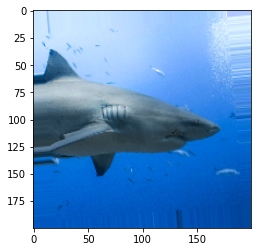

In [9]:
plt.imshow(training_set[0][0][0])

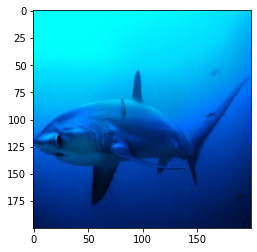

In [10]:
plt.imshow(validation_set[0][0][0])

C:\Users\OCS\.conda\envs\myenv\lib\site-packages\PIL\Image.py:979: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



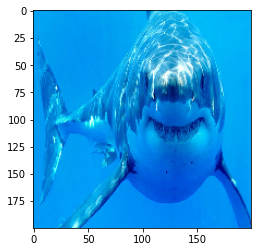

In [11]:
plt.imshow(test_set[0][0][0])